In [10]:
import math
import numpy as np
import time
import cv2
import cython
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import rgb2gray_cython_KS #Cython user defined function

In [11]:
file_raw = "CoxsBazar3"

# Chicago1 #.jpeg
# Chicago2 #.jpeg
# TulipGarden1 #.jpeg
# CoxsBazar1 #.jpeg
# CoxsBazar2 #.jpg
# CoxsBazar3 #.jpeg



file = file_raw + ".jpeg" #.jpg #.jpeg


In [12]:
### Problem 1: Loading 3D Image ###
image = cv2.imread(file, cv2.IMREAD_COLOR)
print(image.shape)


(1080, 1920, 3)


In [13]:
### Problem 2: Conversion to Grayscale (Using OpenCV) ###

startTime = time.time()
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
endTime = time.time()
print(img_gray.shape)
print("Color conversion time %s is %s" %(file,(endTime - startTime)))



(1080, 1920)
Color conversion time CoxsBazar3.jpeg is 0.0023469924926757812


In [14]:
# Display: Original and Grayscale Images

windowName = file + " GrayScale"
img_gray3D = cv2.merge( [img_gray, img_gray, img_gray] )
print(img_gray3D.shape)

conc_img = np.concatenate( (image, img_gray3D), axis = 1)
cv2.imshow(windowName, conc_img)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)


(1080, 1920, 3)


-1

In [15]:
# Storing the grayscale image to Disk

Outfile = file_raw + "_gray.jpg"
cv2.imwrite(Outfile, img_gray)


True

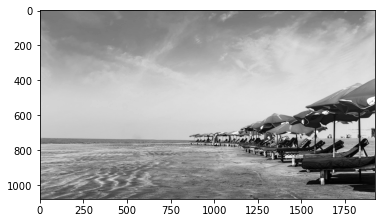

Matrix conversion time for CoxsBazar3.jpeg is 0.01945805549621582


In [16]:
### Problem 3: (Using Matrix) ###

startTime2 = time.time()
R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
img_gray = 0.30*R + 0.59*G + 0.11*B
endTime2 = time.time()
plt.imshow(img_gray, cmap = 'gray')
plt.show()
print("Matrix conversion time for %s is %s" %(file,(endTime2 - startTime2)))


Double loop time for CoxsBazar3.jpeg is 22.5953631401062


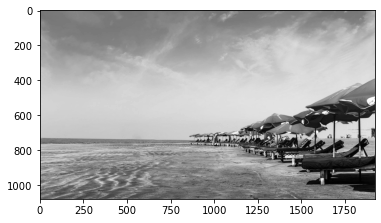

In [17]:
### Problem 4: (Using Double Loop) ###

# img = image
img_gray_iter = np.zeros( (image.shape[0], image.shape[1]), np.uint8) 

startTime3 = time.time()
for i in range(0, image.shape[0], 1):
    for j in range(0, image.shape[1], 1):
        img_gray_iter[i][j] = 0.30*image[i][j][0]
        img_gray_iter[i][j] += 0.59*image[i][j][1] 
        img_gray_iter[i][j] += 0.11*image[i][j][2]
        
endTime3 = time.time()

plt.imshow(img_gray_iter, cmap = 'gray')
print("Double loop time for %s is %s" %(file, endTime3 - startTime3) );


In [18]:
#### Cython Conversion ###

# img = image
img = image.astype(np.int32)
print(img.dtype)

CythonTime = rgb2gray_cython_KS.cython_conversion(img)
print("Cython time : %s" %CythonTime )



int32
Cython time : 0.39261722564697266


In [ ]:
### Problem 5 : Displaying 3 channels separately ###


# img = image
b, g, r = cv2.split(image)

zeros_ch = np.zeros(image.shape[0:2], dtype="uint8")

blue = cv2.merge( [b, zeros_ch, zeros_ch] )
green = cv2.merge( [zeros_ch, g, zeros_ch] )
red = cv2.merge( [zeros_ch, zeros_ch, r] )

windowName = "Original-Blue-Green-Red image"
concatenated_image1 = np.concatenate( (image, blue), axis = 1)
concatenated_image2 = np.concatenate( (green, red), axis = 1)
concatenated_image = np.concatenate( (concatenated_image1, concatenated_image2), axis = 0)

cv2.imshow(windowName, concatenated_image)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)


In [ ]:
### Problem 6: Rotation using built-in functions ###

def SlideAngle(value): 
    value = value*5
    print("Angle is %s degrees" %value)
    
    global image
    theta = value
    row = image.shape[0]
    col = image.shape[1]
    center = (col/2, row/2)

    rotated_matrix = cv2.getRotationMatrix2D( center = center, angle = theta, scale = 1 )
    rotated_image = cv2.warpAffine(src = image, M = rotated_matrix, dsize = (col, row) )
    cv2.imshow(windowName, rotated_image)
    
# img = image
img = cv2.resize(image, (round(image.shape[0]/3), round(image.shape[1]/3)) ) #resizing

windowName = file + " rotation"
cv2.imshow(windowName, img)
cv2.createTrackbar('Slider', windowName, 0, 72, SlideAngle)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)


In [ ]:
### Problem 7: User defined Transformation Matrix ###

def transformation_matrix_KS(center, angle_in_degree, scale):
    
    Theta = math.radians(angle_in_degree)
    CosTheta = math.cos(Theta)
    SinTheta = math.sin(Theta)
    centerY = center[0]
    centerX = center[1]
    
    alpha = scale*CosTheta
    beta = scale*SinTheta
    
    rotated_matrix = np.zeros((2, 3))
    # print(rotated_matrix.shape)
    rotated_matrix[0][:] = [ alpha, beta, ((1-alpha)*centerX - beta*centerY) ]
    rotated_matrix[1][:] =  [-beta, alpha, ( beta*centerX + (1-alpha)*centerY)]
    
    # print(rotated_matrix)
    return rotated_matrix

def SlideAngle2(value):

    value = value*5
    print("Angle is %s degrees" %value)
    
    global image
    theta = value
    row = image.shape[0]
    col = image.shape[1]
    center = (col/2, row/2)

    rotated_matrix = transformation_matrix_KS(center, theta, 1)
    rotated_image = cv2.warpAffine(src = img, M = rotated_matrix, dsize = (col, row) )
    cv2.imshow(windowName, rotated_image)

    
# img = image
img = cv2.resize(img, (round(image.shape[0]/2), round(image.shape[1]/2)) ) #resizing

row = image.shape[0]
col = image.shape[1]
center = (col/2, row/2)

windowName = file + " -- manual rotation and openCV affine"
cv2.imshow(windowName, img) #default view
cv2.createTrackbar('Slider', windowName, 0, 72, SlideAngle2)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

In [ ]:
### Problem 8: inverse mapping ###

def inverse_mapping(angle, image):
    # implements both the matrix transformation and affine
    Theta = math.radians(angle)
    CosTheta = math.cos(Theta)
    SinTheta = math.sin(Theta)
    height = image.shape[0]
    width = image.shape[1]

    #new image properties
    new_height = round( abs(image.shape[0]*CosTheta) + abs(image.shape[1]*SinTheta) ) + 1
    new_width = round( abs(image.shape[1]*CosTheta) + abs(image.shape[0]*SinTheta) ) + 1

    output_img = np.zeros( (new_height, new_width, image.shape[2]) )
    original_centre_height = round(((image.shape[0]+1)/2)-1)    
    original_centre_width = round(((image.shape[1]+1)/2)-1)

    new_centre_height= round(((new_height+1)/2)-1)        
    new_centre_width= round(((new_width+1)/2)-1)          

    for i in range(height):
        for j in range(width):
            
            y=img.shape[0]-1-i-original_centre_height                   
            x=img.shape[1]-1-j-original_centre_width                      

            new_y = round(-x*SinTheta + y*CosTheta)
            new_x = round(x*CosTheta + y*SinTheta)

            new_y = new_centre_height - new_y
            new_x = new_centre_width - new_x

            # boundary check
            if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                output_img[new_y,new_x,:] = image[i,j,:] 

    output_img = output_img.astype('uint8')
    return output_img


### Manual Rotation ###
# img = image
img = cv2.resize(image, (round(image.shape[0]), round(image.shape[1])) ) #resizing

windowName = file + " -- manual rotation"

startTime = time.time()
output_img = inverse_mapping(30, img)
endTime = time.time()

cv2.imshow(windowName, output_img)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

print("Total time for manual rotation is %s" %(endTime - startTime))

